[*********************100%%**********************]  1 of 1 completed


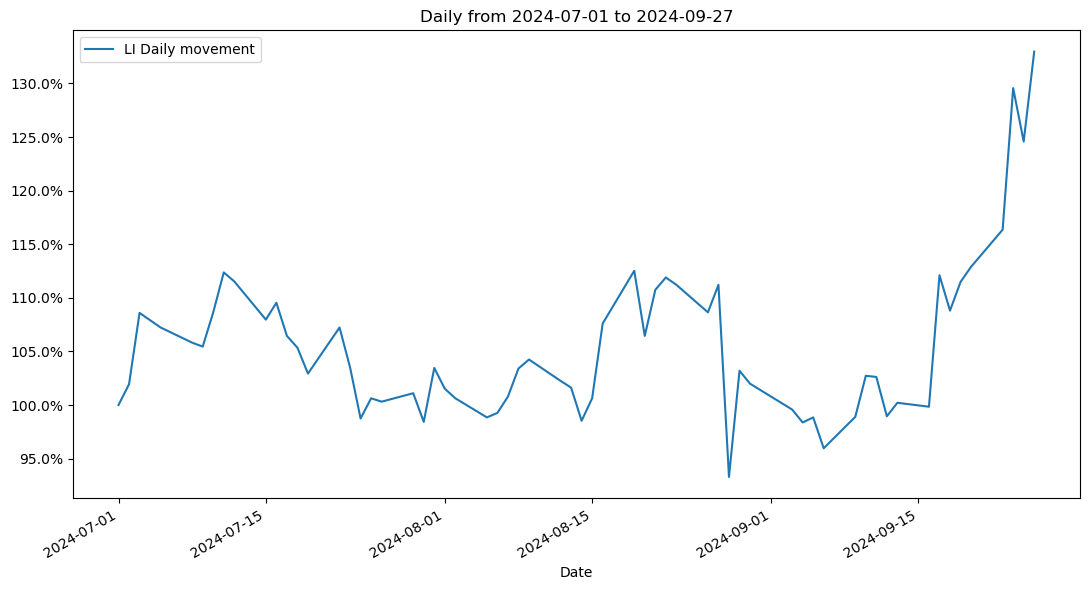

In [5]:
# Part one: total return visualization for income investment

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Configuration
tickers_info = [
    #{"symbol": "SPY", "delay_days": 34, "reinv_factor": 0.85},
    #{"symbol": "BUCK", "delay_days": 0, "reinv_factor": 0.75},
    #{"symbol": "JPST", "delay_days": 0, "reinv_factor": 0.7},
    #{"symbol": "VNLA", "delay_days": 0, "reinv_factor": 0.7},
    #{"symbol": "MINT", "delay_days": 0, "reinv_factor": 0.7},
    #{"symbol": "HIGH", "delay_days": 0, "reinv_factor": 0.75},
    #{"symbol": "VSDA", "delay_days": 1, "reinv_factor": 0.85},
    #{"symbol": "DIVO", "delay_days": 6, "reinv_factor": 0.75},
    #{"symbol": "QQQ", "delay_days": 34, "reinv_factor": 0.8},
    #{"symbol": "XYLD", "delay_days": 6, "reinv_factor": 0.7},
    #{"symbol": "QYLD", "delay_days": 6, "reinv_factor": 0.7},
    #{"symbol": "RYLD", "delay_days": 6, "reinv_factor": 0.7},
    #{"symbol": "SPYI", "delay_days": 2, "reinv_factor": 0.8},
    #{"symbol": "JEPI", "delay_days": 5, "reinv_factor": 0.7},
    #{"symbol": "BUYW", "delay_days": 8, "reinv_factor": 0.7},
    #{"symbol": "FTHI", "delay_days": 5, "reinv_factor": 0.7},
    #{"symbol": "FTQI", "delay_days": 5, "reinv_factor": 0.7},
    #{"symbol": "DIVO", "delay_days": 6, "reinv_factor": 0.75},
    #{"symbol": "PBP", "delay_days": 3, "reinv_factor": 0.7},
    #{"symbol": "KWEB", "delay_days": 2, "reinv_factor": 0.7},
    #{"symbol": "KLIP", "delay_days": 2, "reinv_factor": 0.7},
    #{"symbol": "HYG", "delay_days": 6, "reinv_factor": 0.7},
    #{"symbol": "HYGW", "delay_days": 5, "reinv_factor": 0.7},
    #{"symbol": "PUTW", "delay_days": 3, "reinv_factor": 0.7},
    #{"symbol": "TSLA", "delay_days": 3, "reinv_factor": 0.7},
    #{"symbol": "TSLY", "delay_days": 7, "reinv_factor": 1.0},
    #{"symbol": "HEQT", "delay_days": 0, "reinv_factor": 0.72},
    #{"symbol": "AGG", "delay_days": 0, "reinv_factor": 0.7},
    #{"symbol": "AGGH", "delay_days": 0, "reinv_factor": 0.7},
    #{"symbol": "HELO", "delay_days": 0, "reinv_factor": 0.75},
    #{"symbol": "^GSPC", "delay_days": 0, "reinv_factor": 0.0},
    #{"symbol": "^VIX", "delay_days": 0, "reinv_factor": 0.0},
    #{"symbol": "SVXY", "delay_days": 3, "reinv_factor": 1.0},
    #{"symbol": "SVIX", "delay_days": 3, "reinv_factor": 1.0},
    #{"symbol": "SVOL", "delay_days": 3, "reinv_factor": 1.0},
    #{"symbol": "FXY", "delay_days": 0, "reinv_factor": 0.0},
    {"symbol": "LI", "delay_days": 0, "reinv_factor": 0.0},
    #{"symbol": "SFTBY", "delay_days": 0, "reinv_factor": 0.0}
    #{"symbol": "FXY", "delay_days": 0, "reinv_factor": 0.0}
    # Add more tickers and their respective settings as needed
]

start_date = "2024-07-01"
end_date = "2024-09-27"

plt.figure(figsize=(11, 6))

for ticker_info in tickers_info:
    ticker_symbol = ticker_info["symbol"]
    delay_days = ticker_info["delay_days"]
    reinv_factor = ticker_info["reinv_factor"]
    
    # Fetch the daily data and dividends
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    dividends = yf.Ticker(ticker_symbol).dividends
    dividends.index = dividends.index.date

    # Reindex dividends to match stock_data index, and then shift
    dividends = dividends.reindex(stock_data.index).fillna(0)
    shifted_dividends = dividends.shift(delay_days)

    # Start with an initial investment (e.g., one share)
    shares_owned = 1.0

    # Compute the DRIP return with partial reinvestment
    for index, row in stock_data.iterrows():
        if shifted_dividends[index] > 0:
            shares_bought = (shifted_dividends[index] * reinv_factor) / row['Close']
            shares_owned += shares_bought

        # Calculate total value
        stock_data.at[index, 'DRIP Value Ratio'] = (shares_owned * row['Close']) / stock_data.iloc[0]['Close']

    # Plot the DRIP Value Ratio and annotate the final value
    #stock_data['DRIP Value Ratio'].plot(label=f'{ticker_symbol} DRIP Total Return')
    stock_data['DRIP Value Ratio'].plot(label=f'{ticker_symbol} Daily movement')
    #final_percentage = stock_data.iloc[-1]['DRIP Value Ratio']
    #plt.annotate(f"{ticker_symbol}: {final_percentage:.2%}", 
    #             xy=(stock_data.index[-1], final_percentage),
    #             textcoords="offset points", 
    #             xytext=(45,0),  # x offset for the annotation
    #             ha='center', 
    #             fontsize=10,
    #             weight='bold')

# Format the y-axis as a percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.title(f"DRIP from {start_date} to {end_date}")
plt.title(f"Daily from {start_date} to {end_date}")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
from datetime import datetime

# Define the ticker
ticker = 'SPY'  # Example using SPY, the S&P 500 ETF
data = yf.Ticker(ticker)

# Today's date
today = datetime.now().strftime('%Y-%m-%d')

# Check if today is an expiration date
if today in data.options:
    opt = data.option_chain(today)
    # Calculate volumes
    calls_volume = opt.calls['volume'].sum()
    puts_volume = opt.puts['volume'].sum()
    
    # Plotting
    labels = ['Calls', 'Puts']
    volumes = [calls_volume, puts_volume]
    
    plt.figure(figsize=(8, 5))
    plt.bar(labels, volumes, color=['blue', 'red'])
    plt.title(f'0DTE Options Trading Volume for SPY on {today}')
    plt.ylabel('Volume')
    plt.show()
else:
    print("No 0DTE options available today.")

No 0DTE options available today.


[*********************100%%**********************]  1 of 1 completed


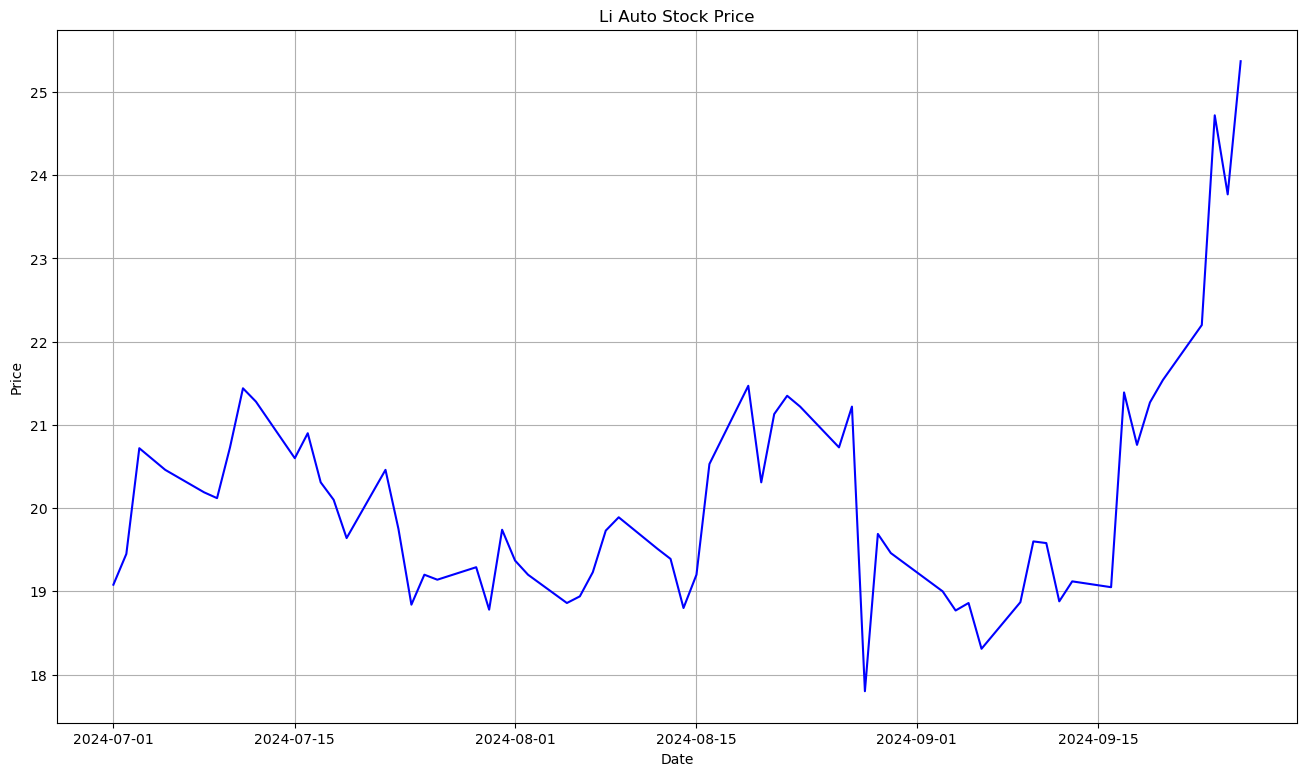

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch stock data
data = yf.download("LI", start="2024-07-01", end="2024-09-27")

# Calculate simple moving averages
data['5-Day MA'] = data['Close'].rolling(window=5).mean()
data['20-Day MA'] = data['Close'].rolling(window=20).mean()
data['50-Day MA'] = data['Close'].rolling(window=50).mean()
data['200-Day MA'] = data['Close'].rolling(window=200).mean()

# Calculate exponential moving averages for GMMA
short_ema_periods = [3, 5, 8, 10, 12, 15]  # Typical short-term EMAs for GMMA
long_ema_periods = [30, 35, 40, 45, 50, 60]  # Typical long-term EMAs for GMMA

for period in short_ema_periods:
    data[f'{period}-Day EMA'] = data['Close'].ewm(span=period, adjust=False).mean()

for period in long_ema_periods:
    data[f'{period}-Day EMA'] = data['Close'].ewm(span=period, adjust=False).mean()

# Plotting
plt.figure(figsize=(16, 9))
plt.plot(data['Close'], label='LI Close', color='blue')

# Plot simple MAs
#plt.plot(data['5-Day MA'], label='5-Day MA', color='green')
#plt.plot(data['20-Day MA'], label='20-Day MA', color='red')
#plt.plot(data['50-Day MA'], label='50-Day MA', color='purple')
#plt.plot(data['200-Day MA'], label='200-Day MA', color='black')

# Plot GMMA
#colors = ['cyan', 'magenta', 'yellow', 'grey', 'orange', 'pink'] * 2  # Color for each EMA line
#for i, period in enumerate(short_ema_periods + long_ema_periods):
#    plt.plot(data[f'{period}-Day EMA'], label=f'{period}-Day EMA', color=colors[i])

plt.title('Li Auto Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
#plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()